## TASK 2.2

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

dev_df = pd.read_csv("/home/dikag/Assignment-1/data/assignment1_dev_set.csv")
val_df = pd.read_csv("/home/dikag/Assignment-1/data/assignment1_val_set.csv")

# Verify
print("Development Set Shape:", dev_df.shape)
print("Validation Set Shape:", val_df.shape)
dev_df.head()

Development Set Shape: (489, 141)
Validation Set Shape: (211, 141)


,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,53.0,19.01,D006262,0.000000,0.000000,0.000000,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,1,PRJNA388263,Metagenomics,Female,21.0,23.50,D006262,0.001028,0.000000,0.000000,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,2,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.001406,0.000000,0.000000,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,3,PRJEB11419,Metagenomics,Female,40.0,23.49,D006262,0.000000,0.008825,0.273562,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,4,PRJEB11419,Metagenomics,Female,30.0,22.60,D006262,0.002878,0.037419,7.359970,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513


In [2]:
np.random.seed(42)
# Initial data exploration
print("\nDevelopment Data Info:")
print(dev_df.info())
print("\nValidation Data Info:")
print(val_df.info())


Development Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Columns: 141 entries, Unnamed: 0 to Ruminococcus gnavus
dtypes: float64(136), int64(1), object(4)
memory usage: 538.8+ KB
None

Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Columns: 141 entries, Unnamed: 0 to Ruminococcus gnavus
dtypes: float64(136), int64(1), object(4)
memory usage: 232.6+ KB
None


In [3]:
# Check for missing values
print("\nMissing values in development data:")
print(dev_df.isna().sum().sum())
print("Missing values in validation data:")
print(val_df.isna().sum().sum())


Missing values in development data:
0
Missing values in validation data:
0


In [4]:
# Check basic statistics
print("\nDevelopment Data Description:")
print(dev_df.describe())
print("\nValidation Data Description:")
print(val_df.describe())


Development Data Description:


       Unnamed: 0    Host age        BMI  Acholeplasma axanthum  \
count  489.000000  489.000000  489.00000             489.000000   
mean   244.000000   46.703497   24.93955               0.016818   
std    141.306405   15.728231    4.20771               0.145035   
min      0.000000   19.000000   16.97000               0.000000   
25%    122.000000   31.000000   22.38000               0.000000   
50%    244.000000   52.000000   25.10000               0.000000   
75%    366.000000   58.000000   25.80000               0.000000   
max    488.000000   81.000000   67.26000               2.861300   

       Acidaminococcus fermentans  Acidaminococcus intestini  \
count                  489.000000                 489.000000   
mean                     0.029968                   0.294917   
std                      0.197816                   0.804704   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%         

In [5]:
# Check for duplicate samples
print("\nDuplicate rows in development data:", dev_df.duplicated().sum())
print("Duplicate rows in validation data:", val_df.duplicated().sum())


Duplicate rows in development data: 0
Duplicate rows in validation data: 0


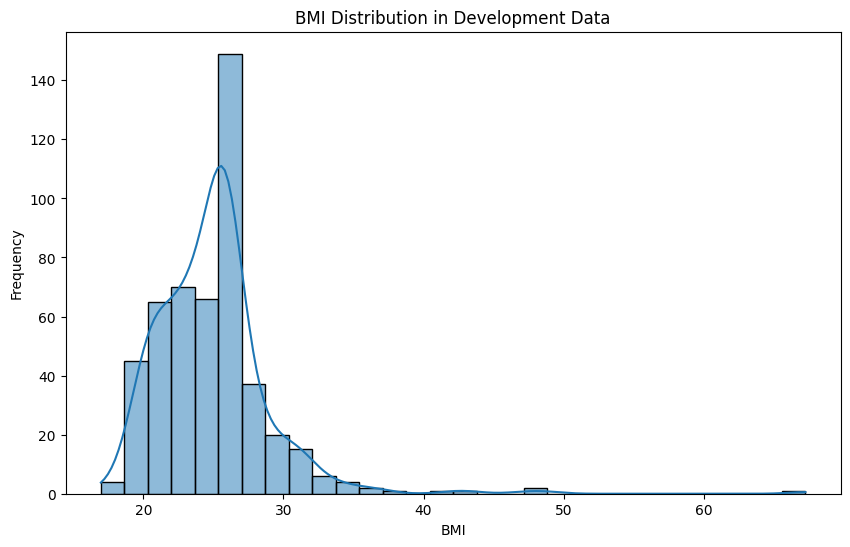

In [6]:
# Check target variable (BMI) distribution
plt.figure(figsize=(10, 6))
sns.histplot(dev_df['BMI'], kde=True, bins=30)
plt.title('BMI Distribution in Development Data')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Data Cleaning Pipeline
def clean_data(df):
    cleaned = df.copy()
    
    # Drop non-feature columns (adjust based on your actual columns)
    cols_to_drop = ['Unnamed: 0', 'Project ID', 'Experiment type', 'Host age', 'Sex', 'Disease MESH ID']
    cleaned = cleaned.drop(columns=cols_to_drop)
    
    # Microbiome-specific handling (zeros are meaningful, don't impute)
    microbiome_cols = cleaned.columns[cleaned.columns != 'BMI']

    
    return cleaned

dev_clean = clean_data(dev_df)
val_clean = clean_data(val_df)

In [ ]:
# STEPS for Feature Scaling
from sklearn.preprocessing import StandardScaler

# 1. First identify numeric features only (excluding BMI)
numeric_features = dev_clean.select_dtypes(include=['number']).columns

print(f"Scaling {len(numeric_features)} numeric features")


# 3. Initialize scaler
scaler = StandardScaler()

# 4. Fit and transform DEV data (only numeric features)
dev_clean[numeric_features] = scaler.fit_transform(dev_clean[numeric_features])

# 5. Transform VAL data with same scaler
val_clean[numeric_features] = scaler.transform(val_clean[numeric_features])

print("Scaling completed successfully!")

Scaling 135 numeric features
Scaling completed successfully!


In [ ]:
# After cleaning and scaling, the files are saved to the correct location:
dev_clean.to_csv("../data/development_final_data.csv", index=False)
val_clean.to_csv("../data/evaluation_final_data.csv", index=False)

print("Files saved successfully")


Files saved successfully to:
-../data/development_final_data.csv
-../data/evaluation_final_data.csv



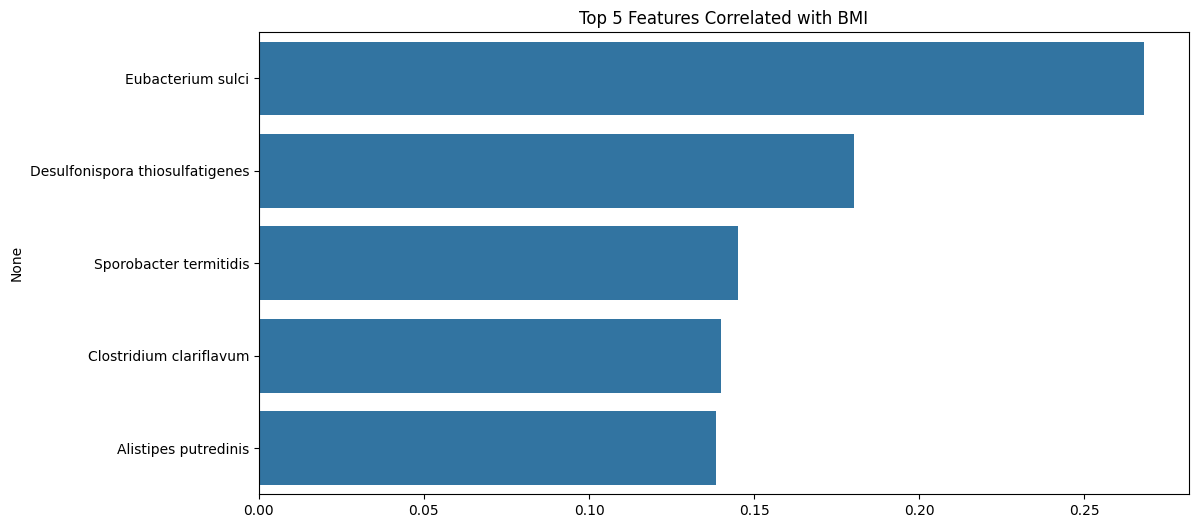

In [9]:
# Additional Visualizations 
plt.figure(figsize=(12, 6))
# Plot top 5 features most correlated with BMI
corr_with_bmi = dev_clean.corr()['BMI'].abs().sort_values(ascending=False)[1:6]
sns.barplot(x=corr_with_bmi.values, y=corr_with_bmi.index)
plt.title('Top 5 Features Correlated with BMI')
plt.show()

## TASK 2.3

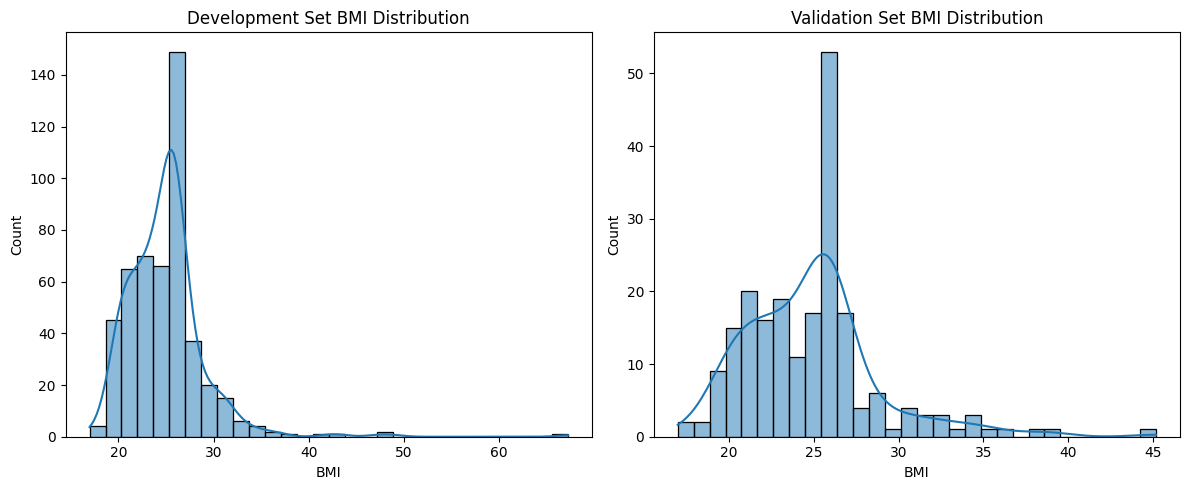

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(dev_df['BMI'], kde=True, bins=30)
plt.title('Development Set BMI Distribution')
plt.subplot(1, 2, 2)
sns.histplot(val_df['BMI'], kde=True, bins=30)
plt.title('Validation Set BMI Distribution')
plt.tight_layout()
plt.show()

In [ ]:
'''# [4] CORRELATION ANALYSIS CELL
print("\nAnalyzing feature correlations...")
try:
    # Ensure we only use numeric columns
    numeric_X_train = dev_df.columns[dev_df.columns != 'BMI']


    plt.figure(figsize=(12, 8))
    sns.heatmap(
        pd.concat([numeric_X_train, dev_df['BMI']], axis=1).corr(),
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        center=0
    )
    plt.title('Top Feature Correlations with BMI')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Error in correlation analysis: {e}")
    print("Problematic columns:", [col for col in dev_df.columns if not pd.api.types.is_numeric_dtype(dev_df[col])])
    raise
'''



Analyzing feature correlations...
Error in correlation analysis: cannot concatenate object of type '<class 'pandas.core.indexes.base.Index'>'; only Series and DataFrame objs are valid
Problematic columns: ['Project ID', 'Experiment type', 'Sex', 'Disease MESH ID']


TypeError: cannot concatenate object of type '<class 'pandas.core.indexes.base.Index'>'; only Series and DataFrame objs are valid

<Figure size 1200x800 with 0 Axes>